In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

In [ ]:
df = pd.read_csv("/content/postings.csv")
df.head()

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,NaN,1.712858e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,This position requires a baseline understandin...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,...,NaN,1.713452e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0


In [ ]:
def show_null_count(df, col):
    # Check if the column exists in the DataFrame
    if col in df.columns:
        # Calculate the number of null values in the column
        null_count = df[col].isnull().sum()
        print(f"Total null values in '{col}': {null_count}")
    else:
        print(f"Column '{col}' does not exist in the DataFrame.")


In [ ]:
for column in df.columns:
    show_null_count(df, column)

Total null values in 'job_id': 0
Total null values in 'company_name': 1719
Total null values in 'title': 0
Total null values in 'description': 7
Total null values in 'max_salary': 94056
Total null values in 'pay_period': 87776
Total null values in 'location': 0
Total null values in 'company_id': 1717
Total null values in 'views': 1689
Total null values in 'med_salary': 117569
Total null values in 'min_salary': 94056
Total null values in 'formatted_work_type': 0
Total null values in 'applies': 100529
Total null values in 'original_listed_time': 0
Total null values in 'remote_allowed': 108603
Total null values in 'job_posting_url': 0
Total null values in 'application_url': 36665
Total null values in 'application_type': 0
Total null values in 'expiry': 0
Total null values in 'closed_time': 122776
Total null values in 'formatted_experience_level': 29409
Total null values in 'skills_desc': 121410
Total null values in 'listed_time': 0
Total null values in 'posting_domain': 39968
Total null v

In [ ]:
def drop_column(df, col):
    # Drop the specified column if it exists, ignoring errors if it doesn't
    df = df.drop(columns=[col], errors='ignore')
    if col in df.columns:
        print(f"Column '{col}' has been dropped.")
    else:
        print(f"Column '{col}' does not exist in the DataFrame.")
    return df

In [ ]:
df = drop_column(df, 'job_posting_url')
df = drop_column(df, 'application_url')
df = drop_column(df, 'application_type')
df = drop_column(df, 'zip_code')

Column 'job_posting_url' does not exist in the DataFrame.
Column 'application_url' does not exist in the DataFrame.
Column 'application_type' does not exist in the DataFrame.
Column 'zip_code' does not exist in the DataFrame.


In [ ]:
df.columns

Index(['job_id', 'company_name', 'title', 'description', 'max_salary',
       'pay_period', 'location', 'company_id', 'views', 'med_salary',
       'min_salary', 'formatted_work_type', 'applies', 'original_listed_time',
       'remote_allowed', 'expiry', 'closed_time', 'formatted_experience_level',
       'skills_desc', 'listed_time', 'posting_domain', 'sponsored',
       'work_type', 'currency', 'compensation_type', 'normalized_salary',
       'fips'],
      dtype='object')

In [ ]:
def convert_unix_to_ddmmyyyy(df, col):
    # Check if the column exists in the DataFrame
    if col in df.columns:
        # Attempt to convert the column to numeric, coercing errors
        df[col] = pd.to_numeric(df[col], errors='coerce')

        # Convert from milliseconds to seconds for Unix timestamps
        df[col] = pd.to_datetime(df[col] / 1000.0, unit='s', errors='coerce')

        # Format dates as 'dd-mm-yyyy', leaving NaT (Not a Time) values unchanged
        df[col] = df[col].dt.strftime('%d-%m-%Y')

        print(f"Column '{col}' has been converted to 'dd-mm-yyyy' format.")
    else:
        print(f"Column '{col}' does not exist in the DataFrame.")

    return df  # Return the modified DataFrame

In [ ]:
df = convert_unix_to_ddmmyyyy(df, 'original_listed_time')
df = convert_unix_to_ddmmyyyy(df, 'listed_time')
df['original_listed_time'].head()
df['listed_time'].head()

Column 'original_listed_time' has been converted to 'dd-mm-yyyy' format.
Column 'listed_time' has been converted to 'dd-mm-yyyy' format.


,listed_time
0,17-04-2024
1,11-04-2024
2,16-04-2024
3,12-04-2024
4,18-04-2024


In [ ]:
def fill_with_median(df, col):
    # Fill missing values in the specified column with the median
    df[col].fillna(df[col].median(), inplace=True)
    return df

In [ ]:
df = fill_with_median(df, 'max_salary')


<ipython-input-10-6f30d73a0dc8>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [ ]:
def fill_with_mean(df, col):
    # Fill missing values in the specified column with the mean
    df[col].fillna(df[col].mean(), inplace=True)
    return df

In [ ]:
def fill_nulls_with_normalized_values_min_max(df, col):
    if col in df.columns:
        # Initialize the MinMaxScaler
        scaler = MinMaxScaler()

        # Normalize the column values, ignoring nulls
        # First, we need to handle nulls: we will fill them temporarily with the column mean
        temp_col = df[col].fillna(df[col].mean())

        # Reshape the data to fit the scaler (2D array expected)
        normalized_values = scaler.fit_transform(temp_col.values.reshape(-1, 1))

        # Replace the original column values with the normalized values
        # Fill nulls in the original column with the corresponding normalized values
        df[col] = df[col].fillna(pd.Series(normalized_values.flatten(), index=df.index))

        print(f"Null values in column '{col}' have been replaced with normalized values.")
    else:
        print(f"Column '{col}' does not exist in the DataFrame.")

    return df  # Return the modified DataFrame


In [ ]:
df = fill_nulls_with_normalized_values_min_max(df, 'normalized_salary')

Null values in column 'normalized_salary' have been replaced with normalized values.


In [ ]:
df['normalized_salary'].isnull().sum()

0

In [ ]:
def calculate_time_difference(df, listed_time_col, expiry_col, new_col='time_difference'):
    if listed_time_col in df.columns and expiry_col in df.columns:
        # Ensure the specified columns are in datetime format
        df[listed_time_col] = pd.to_datetime(df[listed_time_col], errors='coerce')
        df[expiry_col] = pd.to_datetime(df[expiry_col], errors='coerce')

        # Calculate the difference and store it in the new column
        df[new_col] = df[expiry_col] - df[listed_time_col]

        print(f"Time difference calculated and stored in column '{new_col}'.")
    else:
        print(f"One or both columns '{listed_time_col}' and '{expiry_col}' do not exist in the DataFrame.")

    return df  # Return the modified DataFrame

In [ ]:
df = calculate_time_difference(df, 'listed_time', 'expiry')


Time difference calculated and stored in column 'time_difference'.


<ipython-input-16-506461784dd3>:4: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[listed_time_col] = pd.to_datetime(df[listed_time_col], errors='coerce')


In [ ]:
def fill_nan_values_with_0(df, col):
    if col in df.columns:
        df[col].fillna(0, inplace=True)
        print(f"Null values in column '{col}' have been replaced with 0.")
        return df
    else:
        print(f"Column '{col}' does not exist in the DataFrame.")
        return df


In [ ]:
df = fill_nan_values_with_0(df, 'remote_allowed')

Null values in column 'remote_allowed' have been replaced with 0.


<ipython-input-18-a7d5ac453350>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(0, inplace=True)


In [ ]:
df['remote_allowed'].isnull().sum()

0

In [ ]:
def if_one_col_present_replace_with_other_else_generic(df, col1, col2):
    # Remove records where both col1 and col2 are null
    df = df.dropna(subset=[col1, col2], how='all')

    # Replace null values in col1 with values from col2
    df[col1] = df[col1].fillna(df[col2])

    # Replace null values in col2 with values from col1
    df[col2] = df[col2].fillna(df[col1])

    return df  # Return the modified DataFrame


In [ ]:
df = if_one_col_present_replace_with_other_else_generic(df, 'company_name', 'company_id')

<ipython-input-21-3797f6764a56>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col1] = df[col1].fillna(df[col2])
<ipython-input-21-3797f6764a56>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col2] = df[col2].fillna(df[col1])


In [ ]:
df['company_id'].isnull().sum()

0

In [ ]:
import numpy as np
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def plot_time_series(df, time_col):
    # Convert the time column to datetime if not already
    df[time_col] = pd.to_datetime(df[time_col], errors='coerce')

    # Create a new column for month-year format
    df['month_year'] = df[time_col].dt.to_period('M')

    # Count occurrences per month
    monthly_counts = df['month_year'].value_counts().sort_index()

    # Plotting
    plt.figure(figsize=(12, 6))
    monthly_counts.plot(
        title=f'Count Over Time for {time_col}',
        color='blue',
        linewidth=2
    )
    plt.xlabel('Month-Year')
    plt.ylabel('Count')
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

def plot_bar(df, column):
    plt.figure(figsize=(12, 6))
    df[column].value_counts().plot(
        kind='bar',
        title=f'Distribution of {column}',
        color='skyblue',
        edgecolor='black'
    )
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

def plot_box(df, column):
    plt.figure(figsize=(12, 6))
    plt.boxplot(df[column].dropna(), vert=False)  # Drop null values for the plot
    plt.title(f'Box Plot of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.grid(True)
    plt.show()

def plot_histogram(df, column):
    plt.figure(figsize=(12, 6))
    df[column].hist(bins=30, color='lightgreen', edgecolor='black')
    plt.title(f'Histogram of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y')
    plt.show()

def plot_scatter(df, x_col, y_col):
    plt.figure(figsize=(12, 6))
    plt.scatter(df[x_col], df[y_col], alpha=0.6, color='orange')
    plt.title(f'Scatter Plot: {x_col} vs {y_col}', fontsize=14)
    plt.xlabel(x_col, fontsize=12)
    plt.ylabel(y_col, fontsize=12)
    plt.grid()
    plt.show()

def plot_heatmap(df, columns):
    plt.figure(figsize=(12, 8))
    sns.heatmap(df[columns].corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
    plt.title('Correlation Heatmap', fontsize=16)
    plt.show()

def plot_pairplot(df, columns):
    sns.pairplot(df[columns], diag_kind='kde', plot_kws={'alpha': 0.5})
    plt.suptitle('Pair Plot', y=1.02, fontsize=16)
    plt.show()

# Decompose time series data to identify trends and seasonality.
def plot_decomposition(df, time_col):
    plt.figure(figsize=(12, 8))
    decomposition = seasonal_decompose(df[time_col], model='additive')
    decomposition.plot()
    plt.suptitle('Time Series Decomposition', fontsize=16)
    plt.show()

def plot_pca(df):
    # Select the columns for PCA
    columns = ['max_salary', 'min_salary', 'med_salary', 'views', 'applies']

    # Check if we have enough non-null data points
    if df[columns].dropna().shape[0] < 2:
        print("Not enough data for PCA after dropping NaNs.")
        return

    # Impute missing values with the mean of each column
    imputer = SimpleImputer(strategy='mean')
    imputed_df = imputer.fit_transform(df[columns])

    # Perform PCA
    pca = PCA(n_components=2)
    components = pca.fit_transform(imputed_df)

    # Plot the PCA results
    plt.figure(figsize=(10, 8))
    plt.scatter(components[:, 0], components[:, 1], alpha=0.5, c='blue')
    plt.title('PCA of Job Postings')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid()
    plt.show()

def plot_distribution(df, column):
    plt.figure(figsize=(12, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()

def plot_cdf(df, column):
    plt.figure(figsize=(12, 6))
    sorted_data = np.sort(df[column].dropna())
    y = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    plt.plot(sorted_data, y, marker='.', linestyle='none')
    plt.title(f'Cumulative Distribution Function of {column}')
    plt.xlabel(column)
    plt.ylabel('Cumulative Probability')
    plt.grid()
    plt.show()

def plot_stacked_bar(df, column1, column2):
    cross_tab = pd.crosstab(df[column1], df[column2])
    cross_tab.plot(kind='bar', stacked=True, figsize=(12, 6))
    plt.title(f'Stacked Bar Plot of {column1} by {column2}')
    plt.xlabel(column1)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


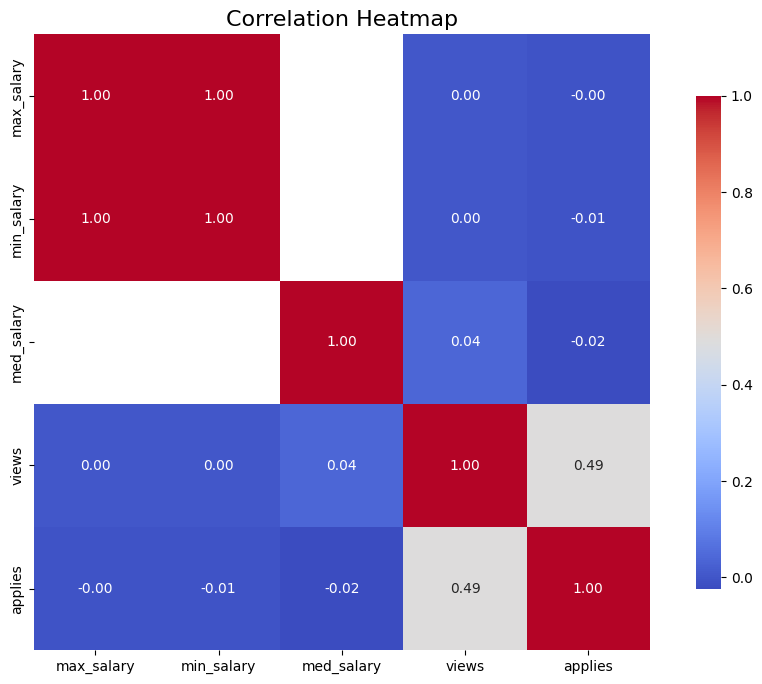

In [ ]:
plot_heatmap(df, ['max_salary', 'min_salary', 'med_salary', 'views', 'applies'])

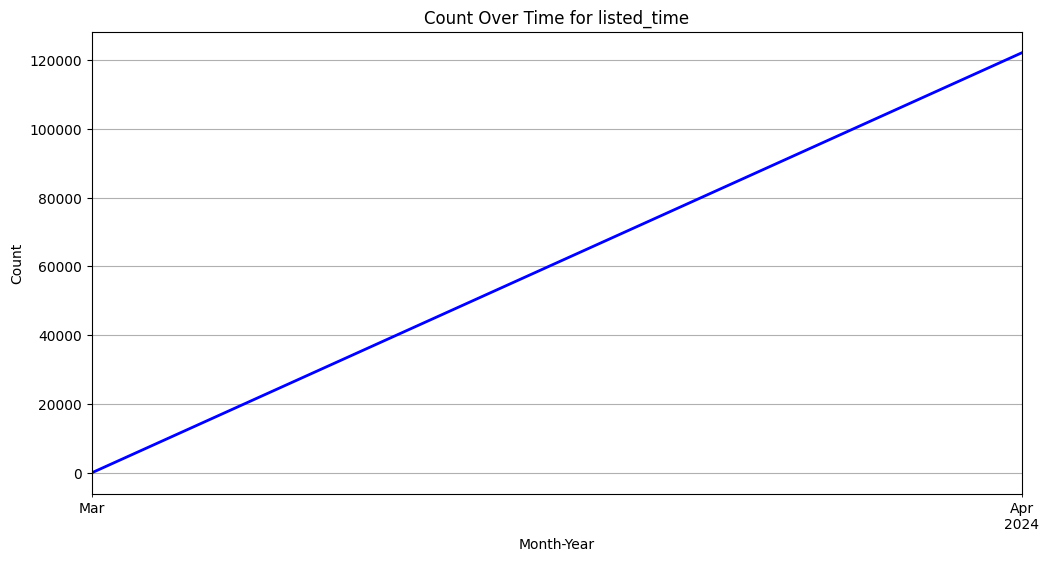

In [ ]:
#Plot: Count of job postings over time. Time needs to be converted
plot_time_series(df, 'listed_time')


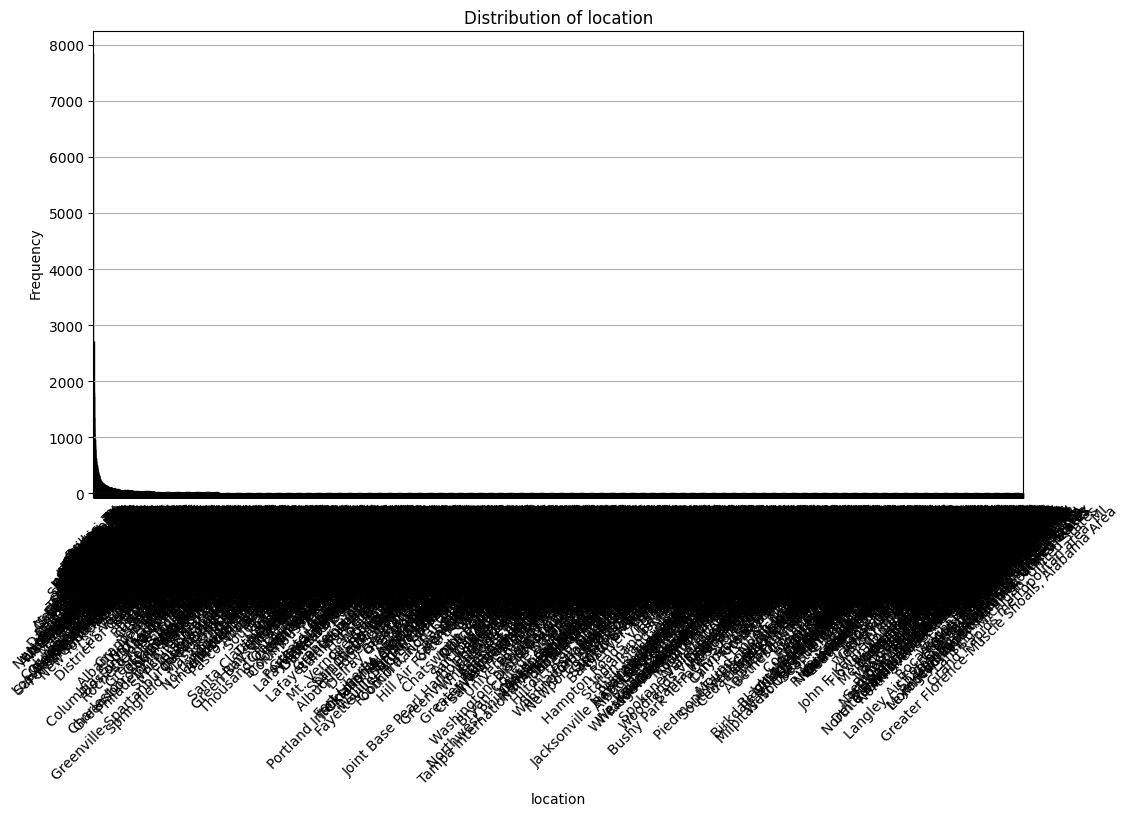

In [ ]:
plot_bar(df, 'location')


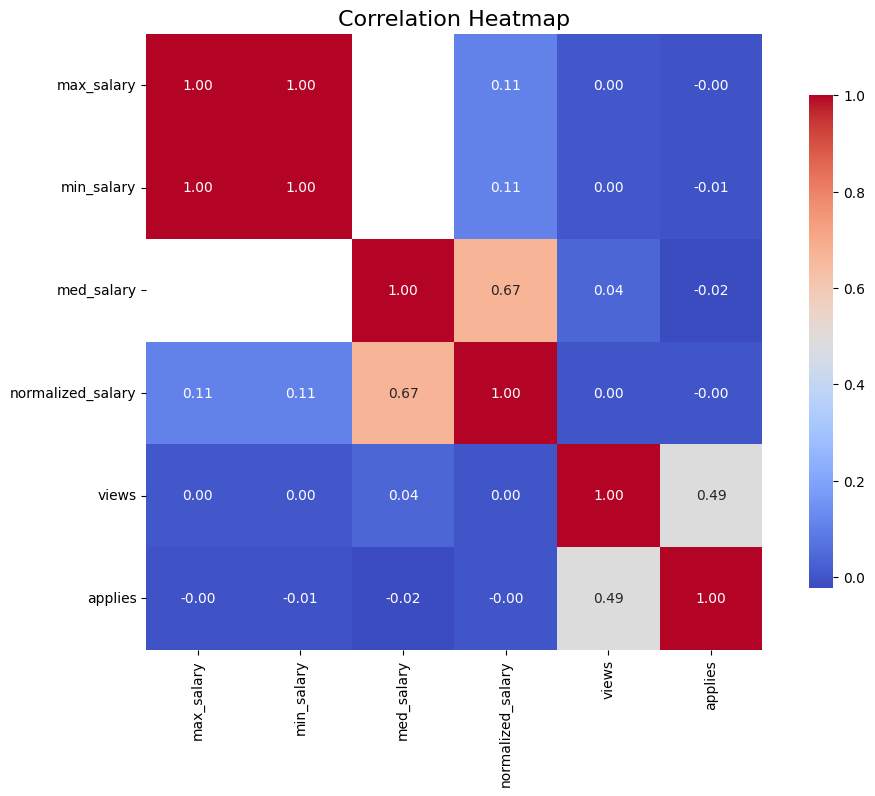

In [ ]:
plot_heatmap(df, ['max_salary', 'min_salary', 'med_salary', 'normalized_salary', 'views', 'applies'])


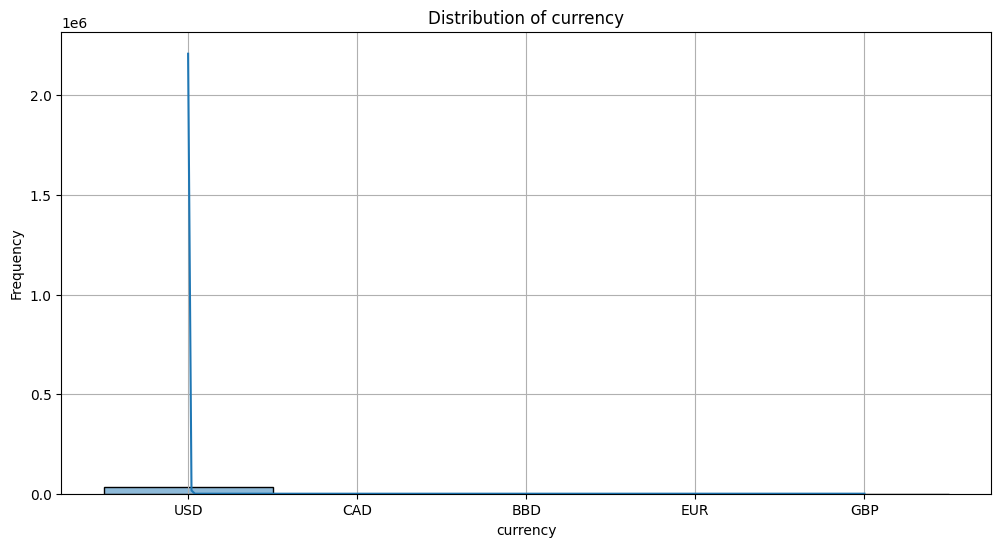

In [ ]:
plot_distribution(df, 'currency')


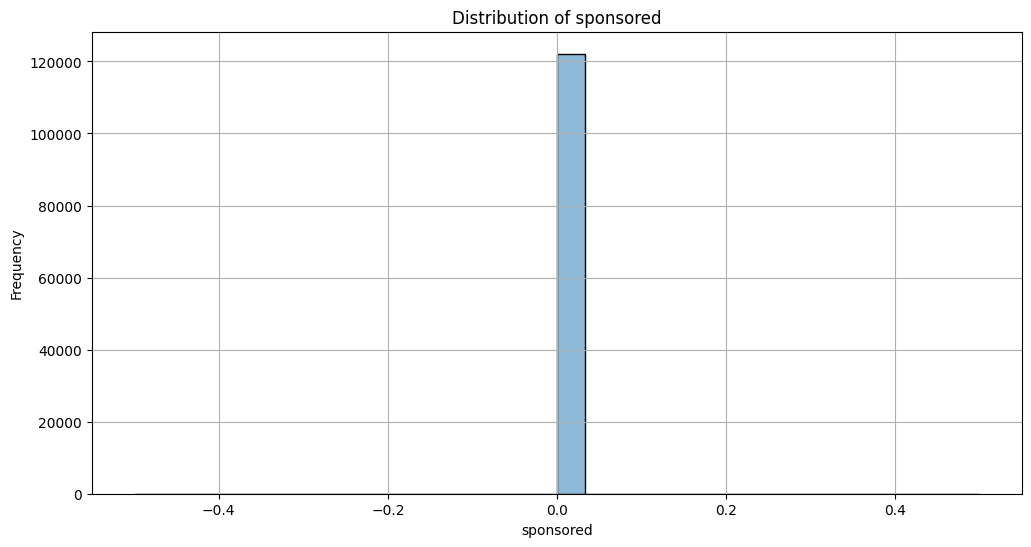

In [ ]:
plot_distribution(df, 'sponsored')

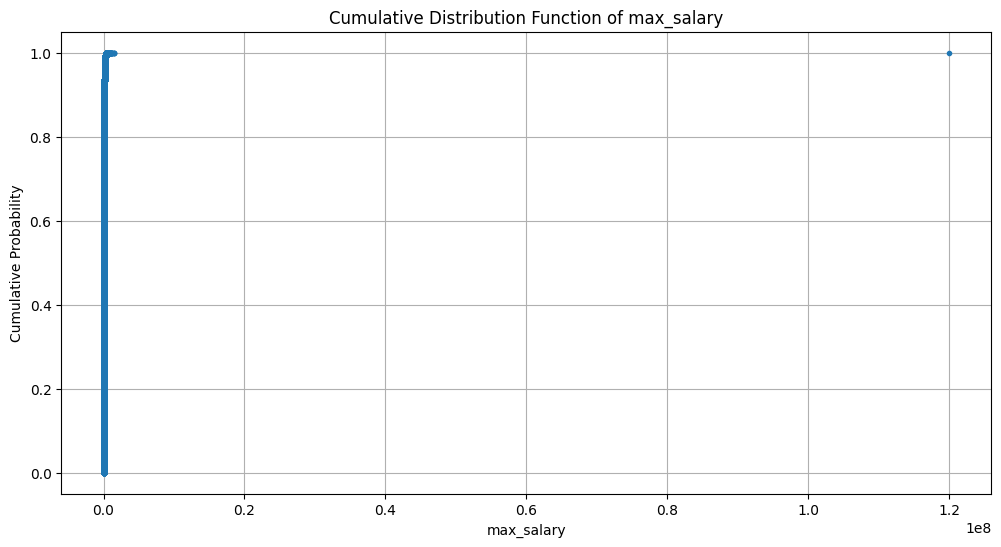

In [ ]:
plot_cdf(df, 'max_salary')


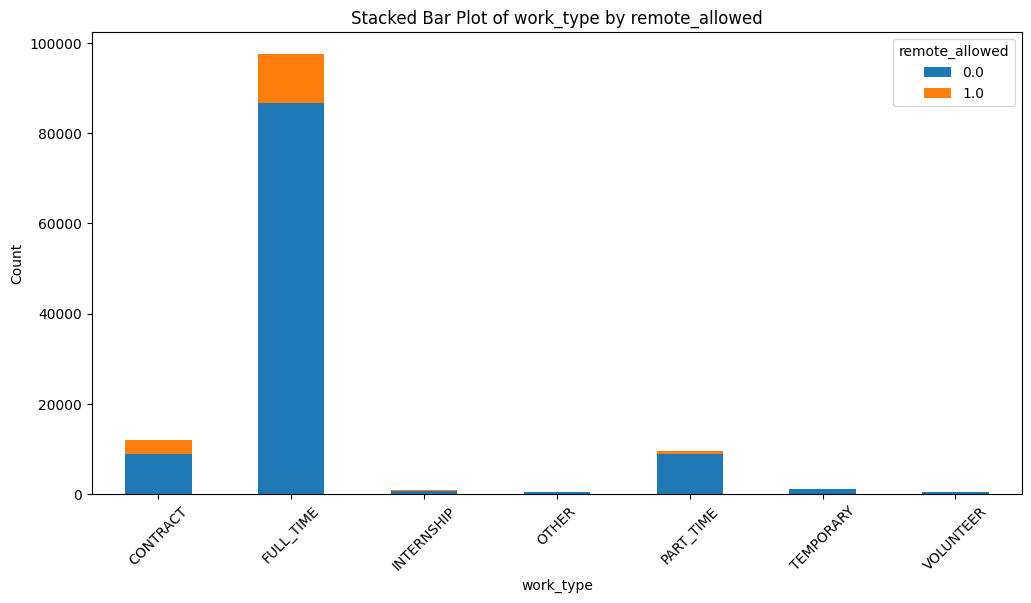

In [ ]:
plot_stacked_bar(df, 'work_type', 'remote_allowed')


<ipython-input-33-dd2f03510adc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='company_name', y='application_rate', data=df, palette='Blues_d')


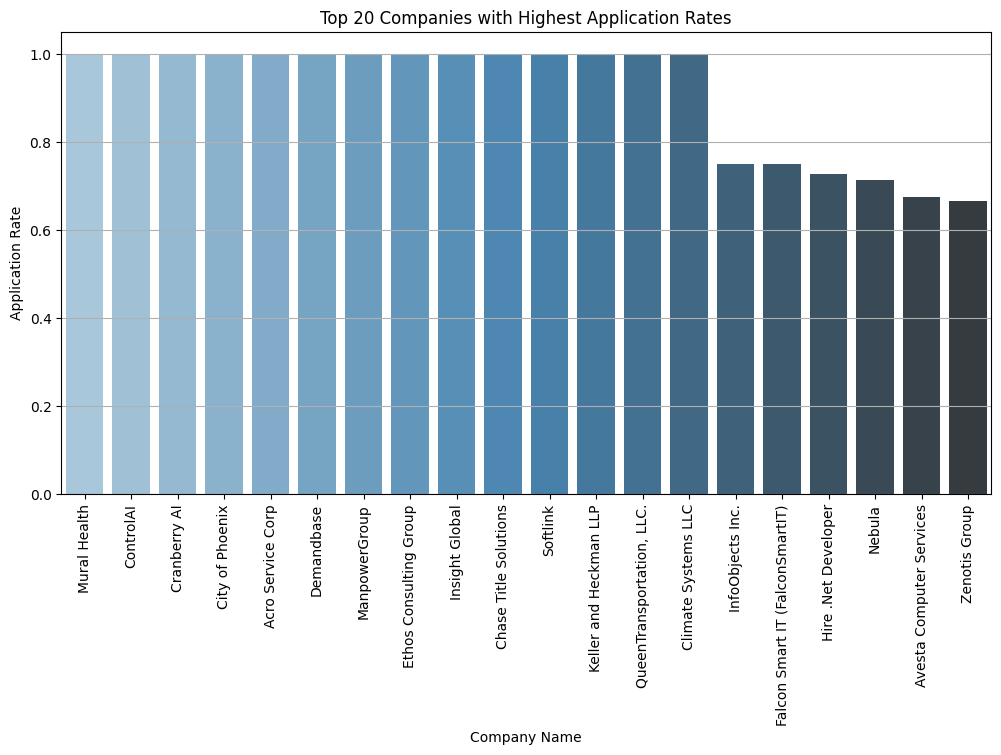

In [ ]:
df['application_rate'] = df['applies'] / df['views']

# Step 1: Sort by application rate in descending order and get top 20 companies
top_20_companies = df[['company_name', 'application_rate']].sort_values(by='application_rate', ascending=False).head(20)

# Step 2: Plot the top 20 companies and their application rates
def plot_top_application_rates(df):
    plt.figure(figsize=(12, 6))
    sns.barplot(x='company_name', y='application_rate', data=df, palette='Blues_d')
    plt.title('Top 20 Companies with Highest Application Rates')
    plt.xlabel('Company Name')
    plt.ylabel('Application Rate')
    plt.xticks(rotation=90)
    plt.grid(axis='y')
    plt.show()

plot_top_application_rates(top_20_companies)

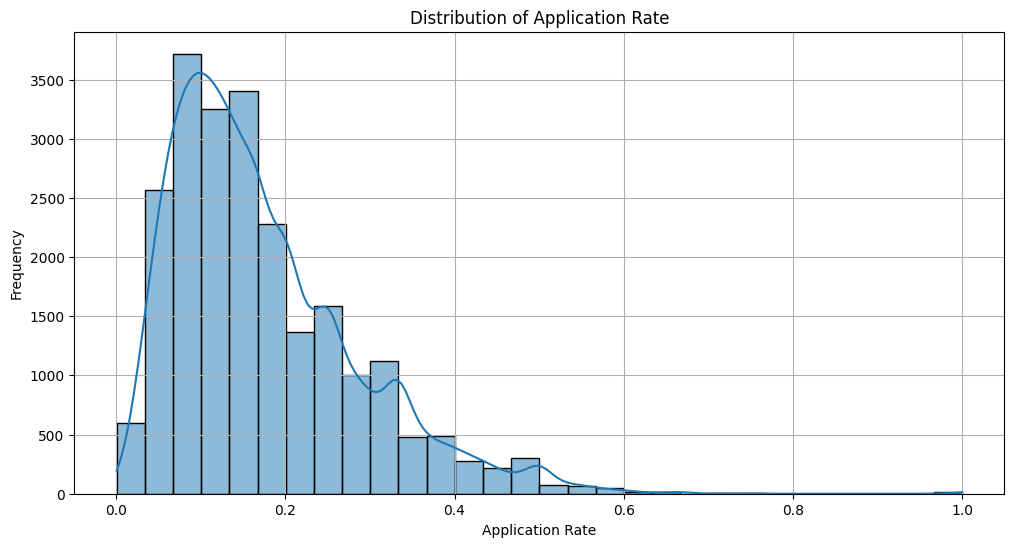

In [ ]:
df['application_rate'] = df['applies'] / df['views']

def plot_application_rate(df):
    plt.figure(figsize=(12, 6))
    sns.histplot(df['application_rate'].dropna(), bins=30, kde=True)
    plt.title('Distribution of Application Rate')
    plt.xlabel('Application Rate')
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()

# Example usage
plot_application_rate(df)

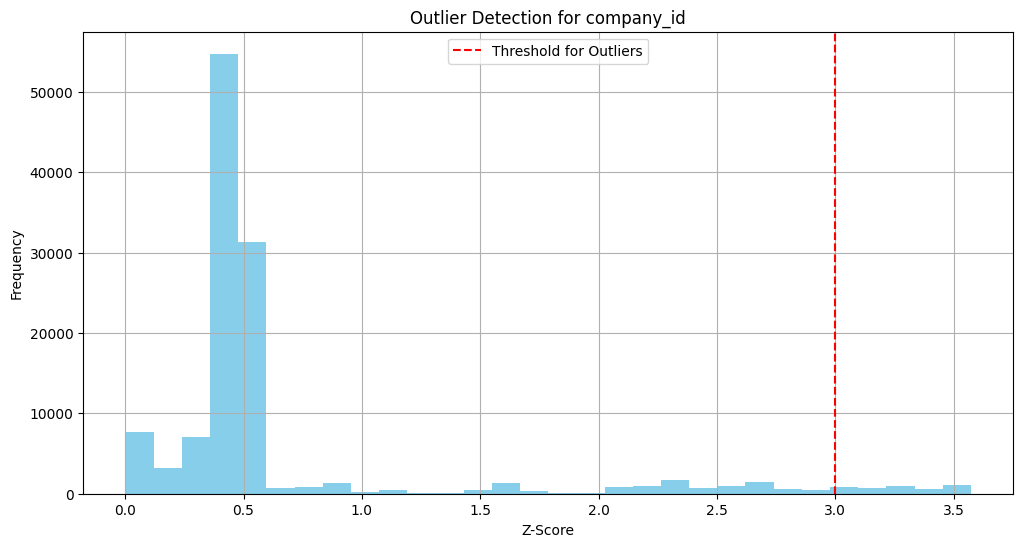

In [ ]:
from scipy import stats

def plot_outliers(df, column):
    z_scores = np.abs(stats.zscore(df[column].dropna()))
    plt.figure(figsize=(12, 6))
    plt.hist(z_scores, bins=30, color='skyblue')
    plt.axvline(3, color='red', linestyle='--', label='Threshold for Outliers')
    plt.title(f'Outlier Detection for {column}')
    plt.xlabel('Z-Score')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid()
    plt.show()

# Example usage
plot_outliers(df, 'company_id')

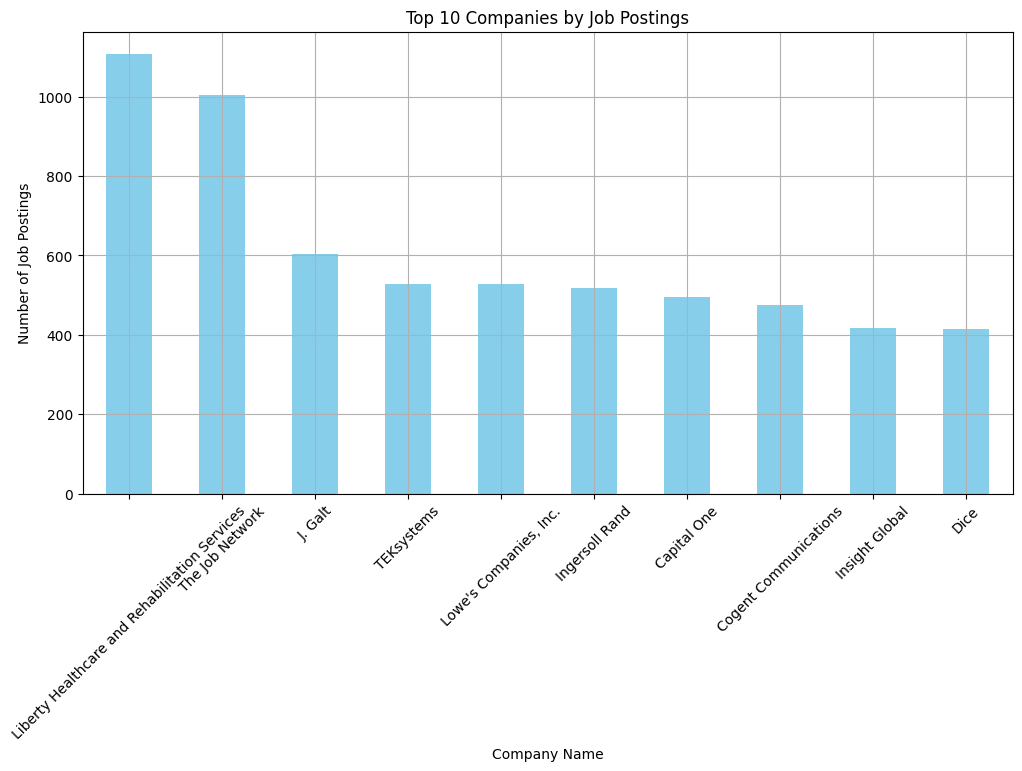

In [ ]:
def plot_top_companies(df, column, title):
    top_companies = df[column].value_counts().nlargest(10)
    plt.figure(figsize=(12, 6))
    top_companies.plot(kind='bar', color='skyblue')
    plt.title(title)
    plt.xlabel('Company Name')
    plt.ylabel('Number of Job Postings')
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

plot_top_companies(df, 'company_name', 'Top 10 Companies by Job Postings')


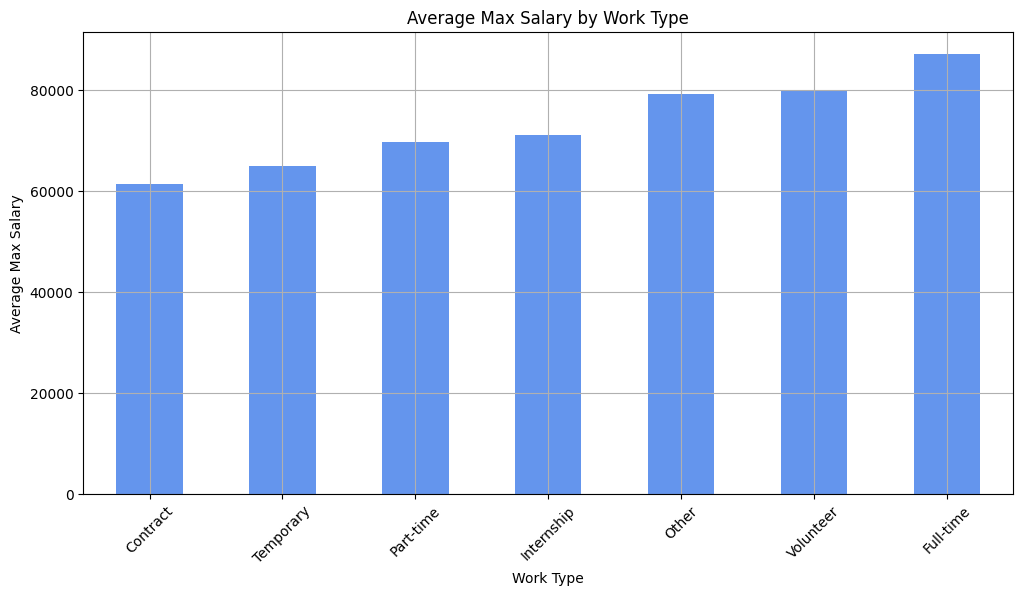

In [ ]:
def plot_salary_by_work_type(df, title):
    plt.figure(figsize=(12, 6))
    df.groupby('formatted_work_type')['max_salary'].mean().sort_values().plot(kind='bar', color='cornflowerblue')
    plt.title(title)
    plt.xlabel('Work Type')
    plt.ylabel('Average Max Salary')
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

plot_salary_by_work_type(df, 'Average Max Salary by Work Type')


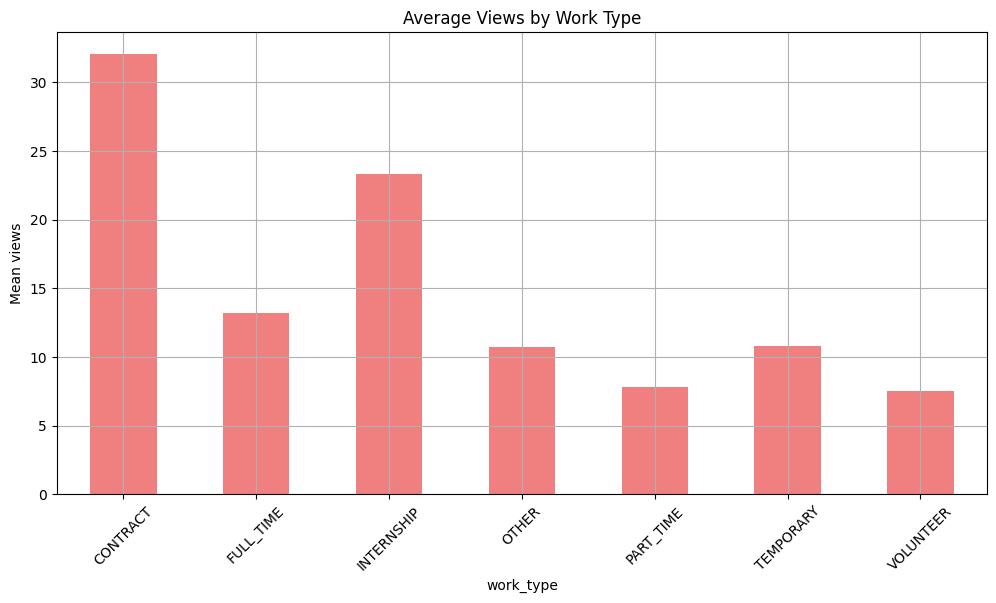

In [ ]:
def plot_grouped_bar(df, category_col, value_col, title):
    plt.figure(figsize=(12, 6))
    df.groupby(category_col)[value_col].mean().plot(kind='bar', color='lightcoral')
    plt.title(title)
    plt.xlabel(category_col)
    plt.ylabel(f'Mean {value_col}')
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()


plot_grouped_bar(df, 'work_type', 'views', 'Average Views by Work Type')


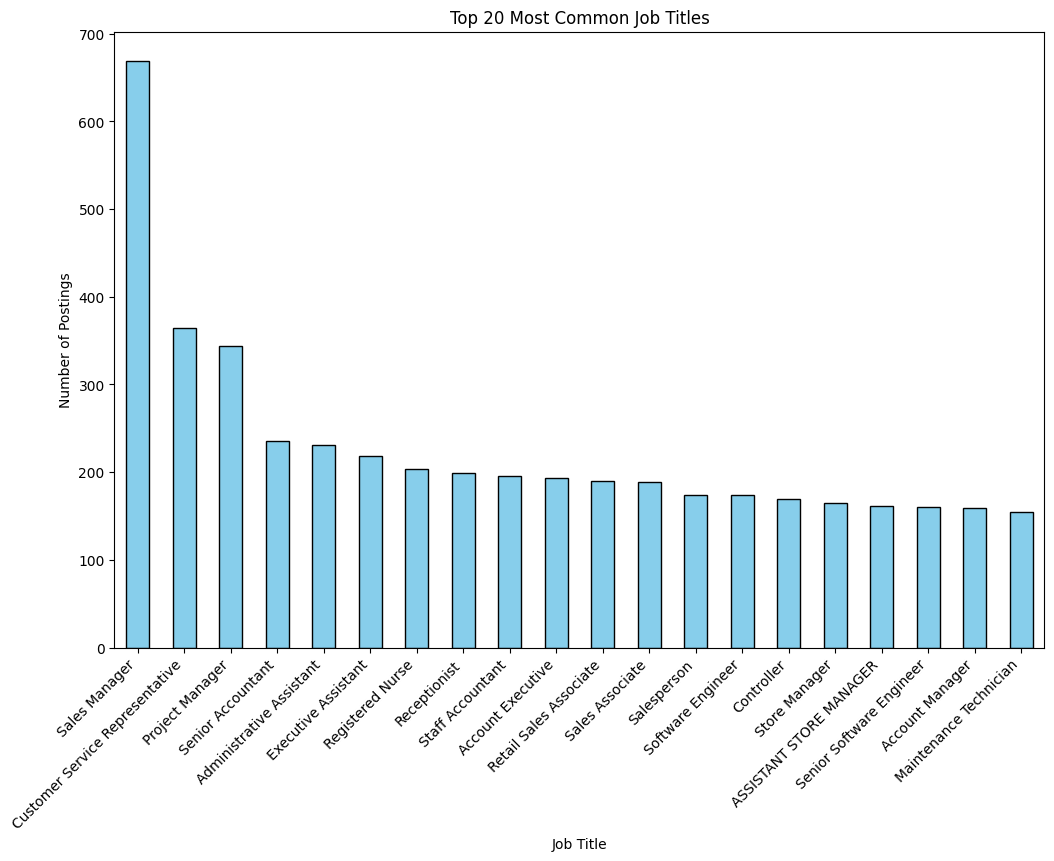

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume df is your DataFrame containing the 'title' column
# Count the frequency of each job title
title_counts = df['title'].value_counts().head(20)  # Select top 20 most common titles

# Plot the bar chart
plt.figure(figsize=(12, 8))
title_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Top 20 Most Common Job Titles")
plt.xlabel("Job Title")
plt.ylabel("Number of Postings")
plt.xticks(rotation=45, ha='right')
plt.show()


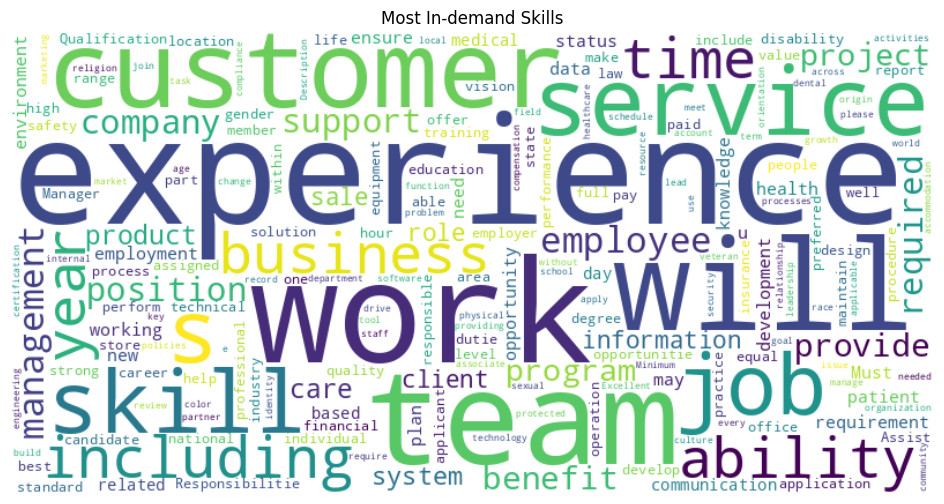

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all skill descriptions into a single text
skills_text = ' '.join(df['description'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(skills_text)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most In-demand Skills")
plt.show()


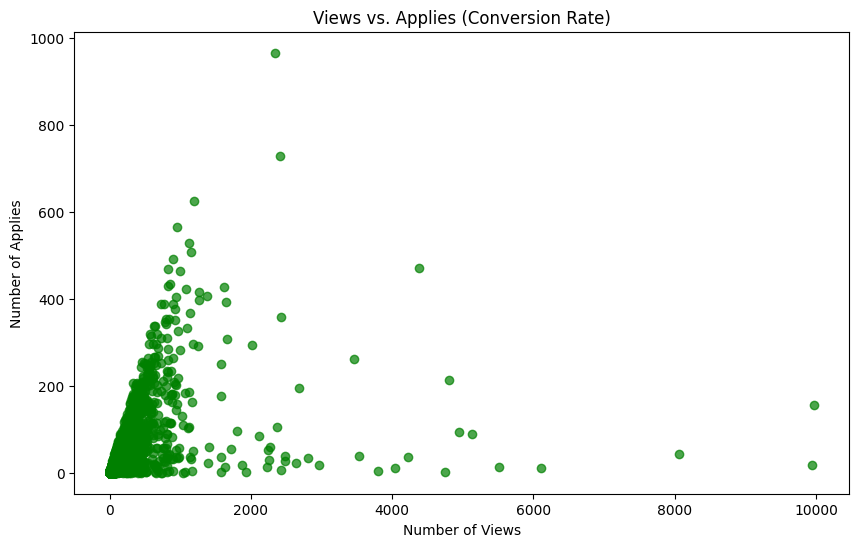

In [ ]:
# Assume df is your DataFrame containing 'views' and 'applies'
plt.figure(figsize=(10, 6))

# Scatter plot of views vs applies
plt.scatter(df['views'], df['applies'], alpha=0.7, color='GREEN')
plt.title("Views vs. Applies (Conversion Rate)")
plt.xlabel("Number of Views")
plt.ylabel("Number of Applies")
plt.show()

<ipython-input-42-e00353d9aa6e>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['remote_allowed'].fillna(0, inplace=True)


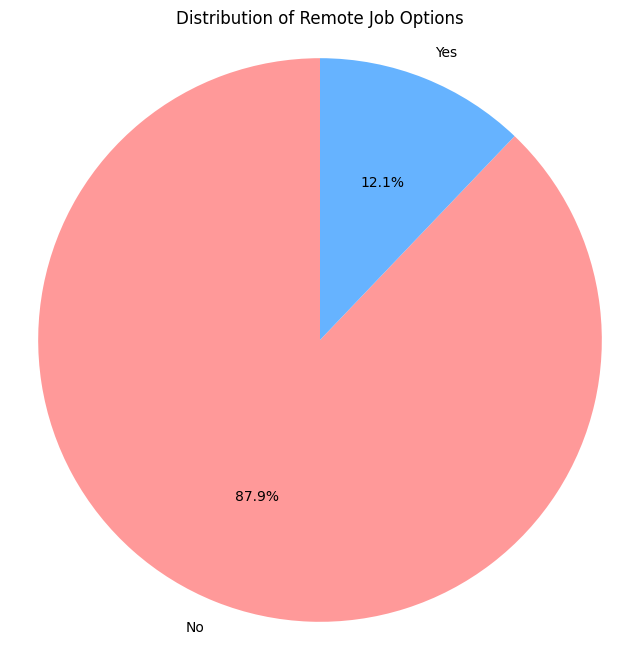

<ipython-input-42-e00353d9aa6e>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='remote_allowed', data=df, palette='pastel')


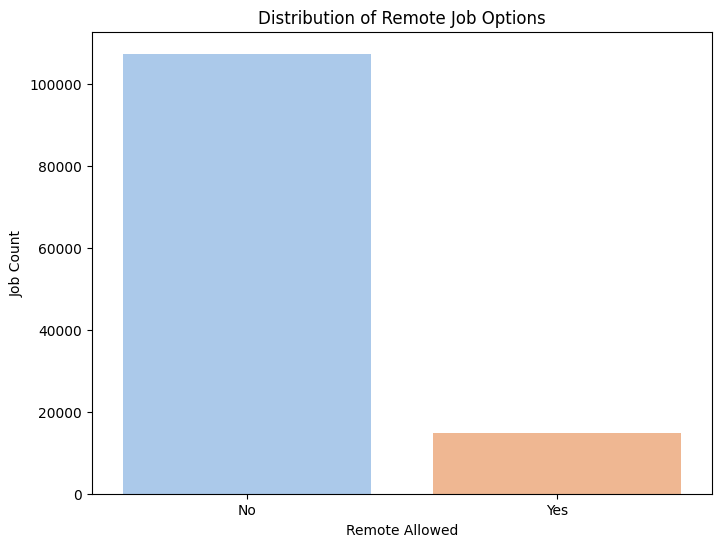

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
# Replace missing values in 'remote_allowed' with 0 (assuming 0 means no remote work)
df['remote_allowed'].fillna(0, inplace=True)

# If 'remote_allowed' is categorical, convert it to an appropriate label (e.g., 0 -> 'No', 1 -> 'Yes')
df['remote_allowed'] = df['remote_allowed'].map({0: 'No', 1: 'Yes'})

# Create a Pie Chart
plt.figure(figsize=(8, 8))
remote_counts = df['remote_allowed'].value_counts()
plt.pie(remote_counts, labels=remote_counts.index, autopct='%1.1f%%', startangle=90, colors=["#ff9999","#66b3ff"])
plt.title('Distribution of Remote Job Options')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Alternatively, create a Bar Plot
plt.figure(figsize=(8, 6))
sns.countplot(x='remote_allowed', data=df, palette='pastel')
plt.title('Distribution of Remote Job Options')
plt.xlabel('Remote Allowed')
plt.ylabel('Job Count')
plt.show()


<ipython-input-43-2053ce8d3145>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['formatted_experience_level'].fillna('Unknown', inplace=True)
<ipython-input-43-2053ce8d3145>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='formatted_experience_level', data=df, palette='Set2', order=df['formatted_experience_level'].value_counts().index)


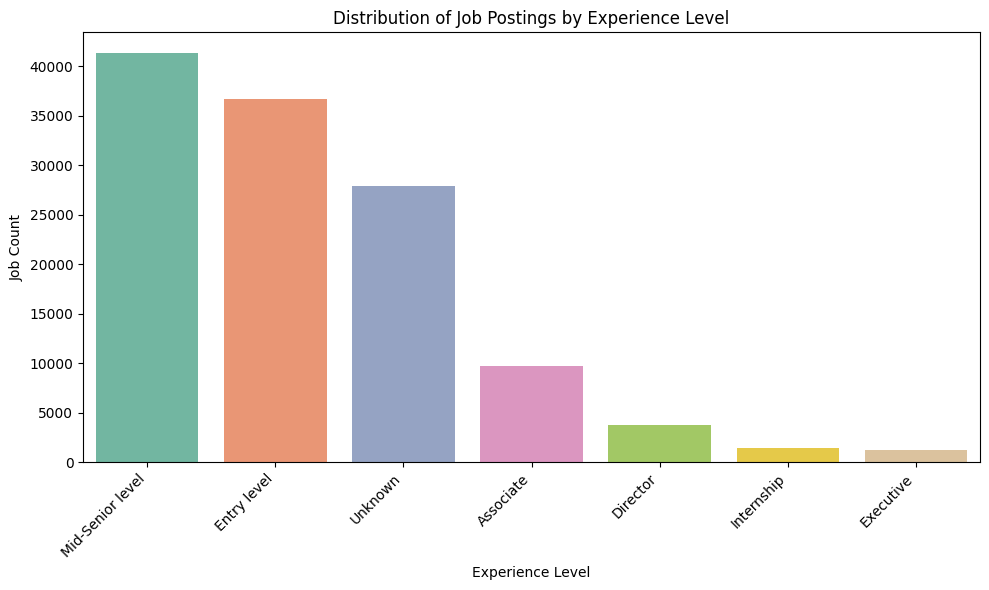

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame

# Check and handle missing values in 'formatted_experience_level' column (e.g., replacing NaNs with 'Unknown')
df['formatted_experience_level'].fillna('Unknown', inplace=True)

# Create a Bar Plot for experience levels
plt.figure(figsize=(10, 6))
sns.countplot(x='formatted_experience_level', data=df, palette='Set2', order=df['formatted_experience_level'].value_counts().index)
plt.title('Distribution of Job Postings by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Job Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to avoid label clipping
plt.show()


<ipython-input-49-ff8d8ca2dea6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['listed_time'] = pd.to_datetime(df['listed_time'])
<ipython-input-49-ff8d8ca2dea6>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sponsored_label'] = df['sponsored'].map({1: 'Sponsored', 0: 'Non-Sponsored'})


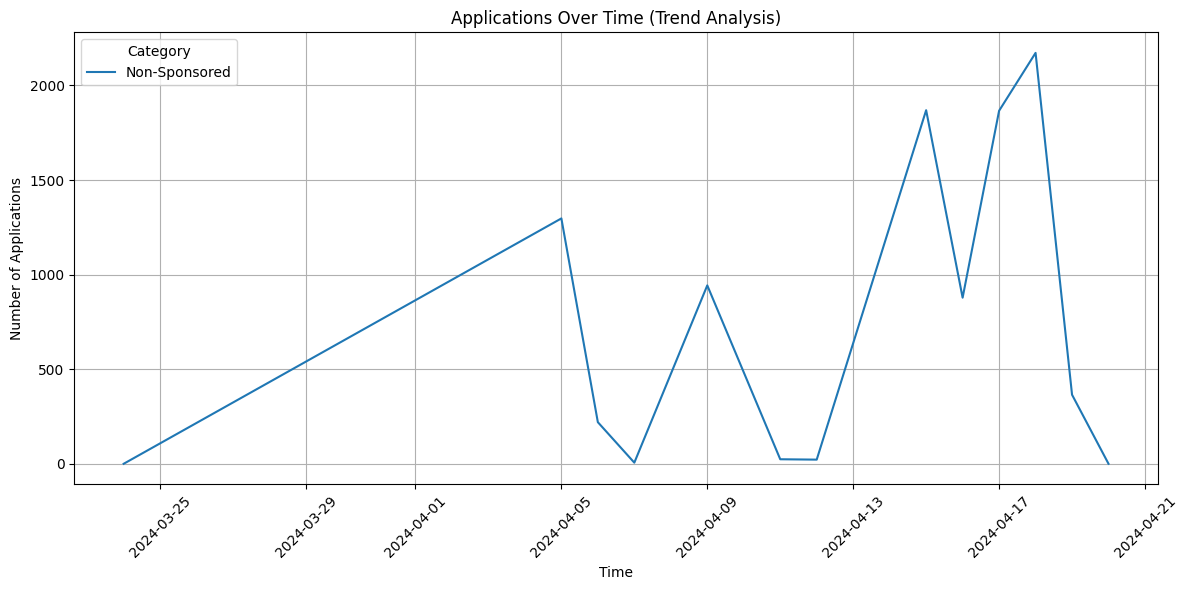

In [ ]:
# Assuming your data is in a DataFrame named df
# Ensure 'listed_time' is in datetime format
df['listed_time'] = pd.to_datetime(df['listed_time'])

# Optionally, if you want to aggregate by month or another time period:
# df = df.resample('M', on='listed_time').sum().reset_index()

# Check if you have different categories like 'sponsored'
if 'sponsored' in df.columns:
    # Map sponsored values to 'Sponsored' or 'Non-Sponsored'
    df['sponsored_label'] = df['sponsored'].map({1: 'Sponsored', 0: 'Non-Sponsored'})
    categories = df['sponsored_label'].unique()
else:
    categories = ['Overall']

plt.figure(figsize=(12, 6))

# Plotting multiple lines based on categories (if applicable)
for category in categories:
    if category == 'Overall':
        df_filtered = df
    else:
        df_filtered = df[df['sponsored_label'] == category]

    # Group by listed_time to get the sum of applies if there are multiple entries per date
    df_grouped = df_filtered.groupby('listed_time')['applies'].sum().reset_index()

    # Plot the line graph
    plt.plot(df_grouped['listed_time'], df_grouped['applies'], label=category)

# Add title and labels
plt.title("Applications Over Time (Trend Analysis)")
plt.xlabel("Time")
plt.ylabel("Number of Applications")
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


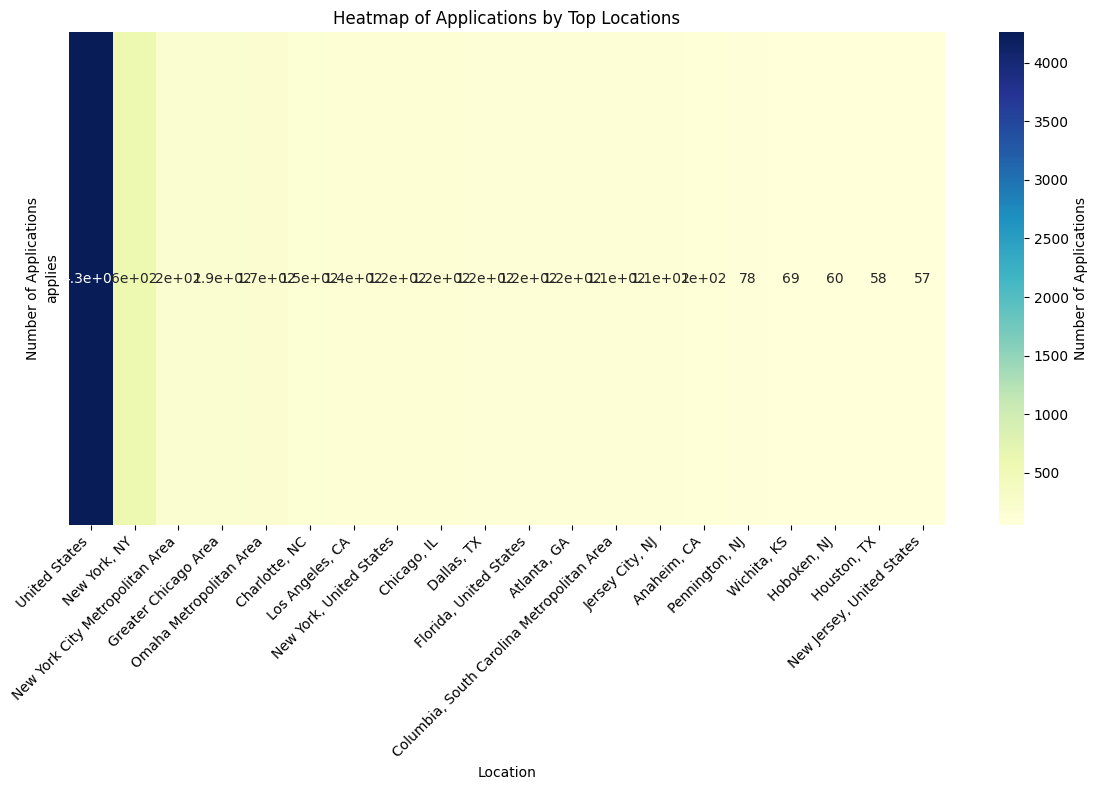

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df and has columns 'location' and 'applies'

# Step 1: Aggregate data by location to get the total number of applications
location_applications = df.groupby('location')['applies'].sum().reset_index()

# Step 2: Sort by the number of applications and select the top 20 locations
top_locations = location_applications.sort_values(by='applies', ascending=False).head(20)

# Step 3: Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    top_locations.set_index('location').T,
    cmap='YlGnBu',
    annot=True,
    cbar_kws={'label': 'Number of Applications'}
)

# Add titles and labels
plt.title("Heatmap of Applications by Top Locations")
plt.xlabel("Location")
plt.ylabel("Number of Applications")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


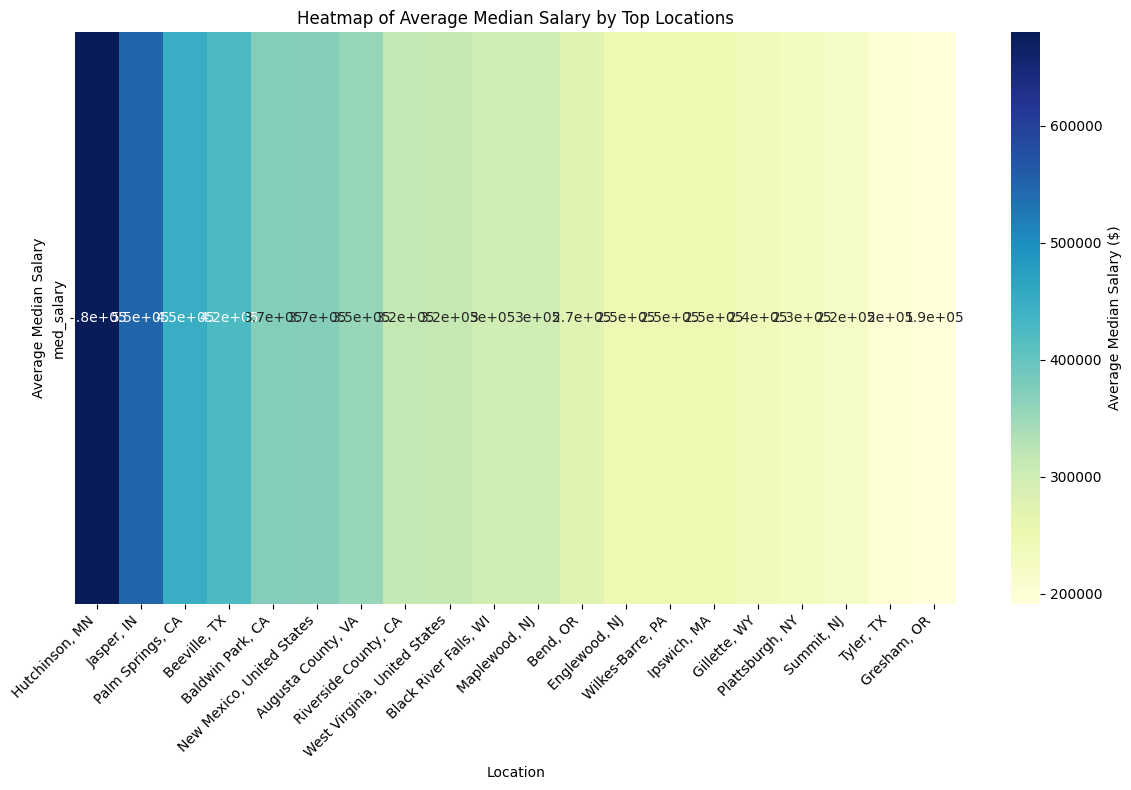

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df and has columns 'location' and 'med_salary'

# Step 1: Clean and Aggregate data by location to get the average of med_salary
# Dropping rows with missing median salary values
df = df.dropna(subset=['med_salary'])

# Step 2: Group by location and calculate the average median salary
location_salary = df.groupby('location')['med_salary'].mean().reset_index()

# Step 3: Sort by the average median salary and select the top 20 locations
top_locations_salary = location_salary.sort_values(by='med_salary', ascending=False).head(20)

# Step 4: Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    top_locations_salary.set_index('location').T,
    cmap='YlGnBu',
    annot=True,
    cbar_kws={'label': 'Average Median Salary ($)'}
)

# Add titles and labels
plt.title("Heatmap of Average Median Salary by Top Locations")
plt.xlabel("Location")
plt.ylabel("Average Median Salary")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


<ipython-input-51-417b1597bb4d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['listed_time'] = pd.to_datetime(df['listed_time'])
<ipython-input-51-417b1597bb4d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['closed_time'] = pd.to_datetime(df['closed_time'])
<ipython-input-51-417b1597bb4d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

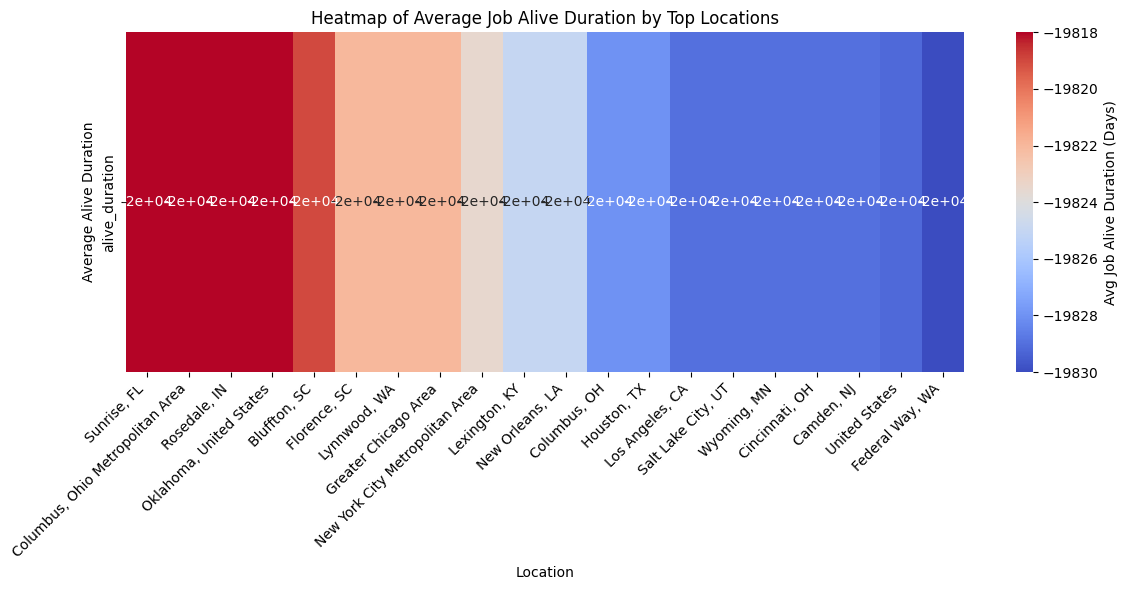

In [ ]:
# Assuming your DataFrame is named df
# Ensure 'listed_time' and 'closed_time' are in datetime format
df['listed_time'] = pd.to_datetime(df['listed_time'])
df['closed_time'] = pd.to_datetime(df['closed_time'])

# Step 1: Calculate the job alive duration in days
df['alive_duration'] = (df['closed_time'] - df['listed_time']).dt.days

# Step 2: Group by location and calculate the average job alive duration
location_duration = df.groupby('location')['alive_duration'].mean().reset_index()

# Step 3: Sort by duration and select top 20 locations (if needed)
top_locations = location_duration.sort_values(by='alive_duration', ascending=False).head(20)

# Step 4: Creating a Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    top_locations.set_index('location').T,
    cmap='coolwarm',
    annot=True,
    cbar_kws={'label': 'Avg Job Alive Duration (Days)'}
)
plt.title("Heatmap of Average Job Alive Duration by Top Locations")
plt.xlabel("Location")
plt.ylabel("Average Alive Duration")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Data Types:
job_id                                  int64
company_name                           object
title                                  object
description                            object
max_salary                            float64
pay_period                             object
location                               object
company_id                            float64
views                                 float64
med_salary                            float64
min_salary                            float64
formatted_work_type                    object
applies                               float64
original_listed_time                   object
remote_allowed                         object
expiry                                 object
closed_time                    datetime64[ns]
formatted_experience_level             object
skills_desc                            object
listed_time                    datetime64[ns]
posting_domain                         object
sponsored             

<ipython-input-71-b792fe0de667>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['listed_time'] = pd.to_datetime(df['listed_time'], errors='coerce')
<ipython-input-71-b792fe0de667>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['expiry'] = pd.to_datetime(df['expiry'], errors='coerce')
<ipython-input-71-b792fe0de667>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

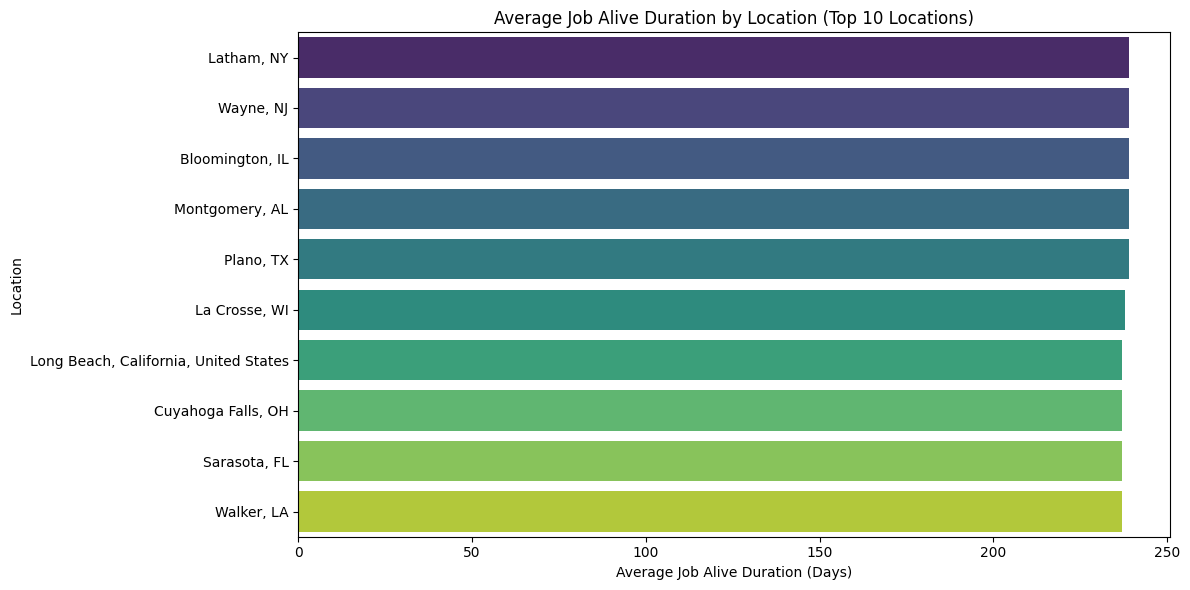

<ipython-input-71-b792fe0de667>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['sponsored'] = df_clean['sponsored'].map({1: 'Sponsored', 0: 'Non-Sponsored'})
<ipython-input-71-b792fe0de667>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sponsored', y='alive_duration', data=sponsored_duration, palette='coolwarm')



Average job alive duration by sponsored vs non-sponsored:
       sponsored  alive_duration
0  Non-Sponsored      141.392911


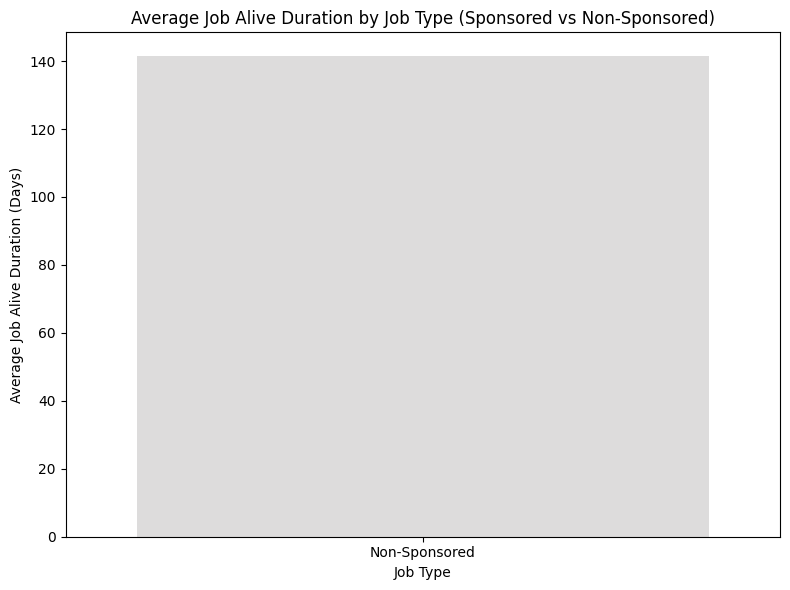

In [ ]:

print("Data Types:")
print(df.dtypes)

print("\nFirst few rows of the data:")
print(df.head())

# Step 2: Ensure 'listed_time' and 'closed_time' are in datetime format
df['listed_time'] = pd.to_datetime(df['listed_time'], errors='coerce')
df['expiry'] = pd.to_datetime(df['expiry'], errors='coerce')

# Step 3: Calculate the 'alive_duration' in days
df['alive_duration'] = (df['expiry'] - df['listed_time']).dt.days

# Step 4: Check for NaT values in 'alive_duration' and filter out rows with NaT
print("\nRows with missing 'alive_duration':")
print(df[df['alive_duration'].isna()])

# Step 5: Check for valid data before plotting
# Remove rows with missing 'alive_duration' or locations
df_clean = df.dropna(subset=['alive_duration', 'location'])

# Step 6: Visualize the average job alive duration by location
location_duration = df_clean.groupby('location')['alive_duration'].mean().reset_index()

# Check if we have data for locations
print("\nAverage job alive duration by location (Top 5):")
print(location_duration.head())

# Only keep locations with non-null average job alive durations
location_duration = location_duration[location_duration['alive_duration'].notna()]

# Sort by average job alive duration and select the top 10 locations
top_location_duration = location_duration.sort_values(by='alive_duration', ascending=False).head(10)

# Plotting
if not top_location_duration.empty:
    plt.figure(figsize=(12, 6))
    sns.barplot(x='alive_duration', y='location', data=top_location_duration, palette='viridis')
    plt.title('Average Job Alive Duration by Location (Top 10 Locations)')
    plt.xlabel('Average Job Alive Duration (Days)')
    plt.ylabel('Location')
    plt.tight_layout()
    plt.show()
else:
    print("No data available to plot for Job Alive Duration by Location")

# Step 7: Visualize the average job alive duration by sponsored vs non-sponsored
if 'sponsored' in df_clean.columns:
    df_clean['sponsored'] = df_clean['sponsored'].map({1: 'Sponsored', 0: 'Non-Sponsored'})

    # Group by 'sponsored' to calculate the average job alive duration per type
    sponsored_duration = df_clean.groupby('sponsored')['alive_duration'].mean().reset_index()

    # Check if we have valid data for sponsored vs non-sponsored
    print("\nAverage job alive duration by sponsored vs non-sponsored:")
    print(sponsored_duration)

    # Plotting
    if not sponsored_duration.empty:
        plt.figure(figsize=(8, 6))
        sns.barplot(x='sponsored', y='alive_duration', data=sponsored_duration, palette='coolwarm')
        plt.title('Average Job Alive Duration by Job Type (Sponsored vs Non-Sponsored)')
        plt.xlabel('Job Type')
        plt.ylabel('Average Job Alive Duration (Days)')
        plt.tight_layout()
        plt.show()
    else:
        print("No data available to plot for Sponsored vs Non-Sponsored Job Alive Duration")
else:
    print("The 'sponsored' column is missing or incorrectly formatted.")


In [ ]:
df['listed_time']

,listed_time
9,2024-04-07
16,2024-04-11
30,2024-04-19
65,2024-04-12
103,2024-04-18
...,...
123655,2024-04-19
123666,2024-04-19
123674,2024-04-19
123700,2024-04-19


In [ ]:
df = convert_unix_to_ddmmyyyy(df, 'expiry')

Column 'expiry' has been converted to 'dd-mm-yyyy' format.


<ipython-input-8-5b37bd39408a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')
<ipython-input-8-5b37bd39408a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_datetime(df[col] / 1000.0, unit='s', errors='coerce')
<ipython-input-8-5b37bd39408a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

<ipython-input-74-464894844fc7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['listed_time'] = pd.to_datetime(df['listed_time'])
<ipython-input-74-464894844fc7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['expiry'] = pd.to_datetime(df['expiry'])
<ipython-input-74-464894844fc7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

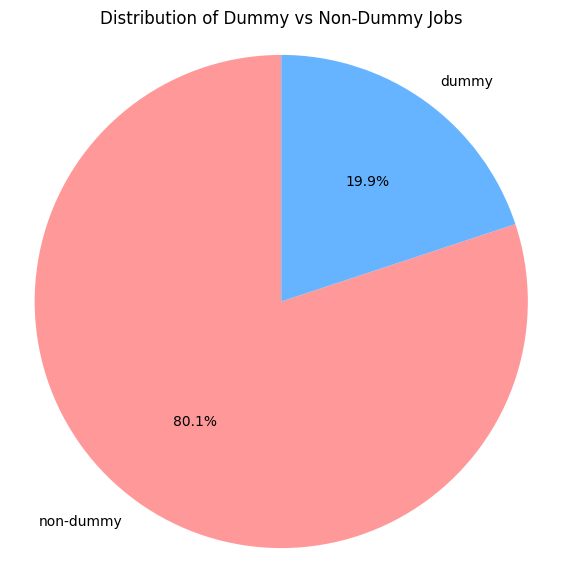

In [ ]:
# Convert 'listed_time' and 'expiry' to datetime format
df['listed_time'] = pd.to_datetime(df['listed_time'])
df['expiry'] = pd.to_datetime(df['expiry'])

# Calculate the duration between expiry and listed_time
df['duration'] = (df['expiry'] - df['listed_time']).dt.days

# Classify jobs as 'dummy' or 'non-dummy'
df['job_type'] = df['duration'].apply(lambda x: 'dummy' if x > 120 else 'non-dummy')  # 4 months = 120 days

# Count the number of dummy and non-dummy jobs
job_counts = df['job_type'].value_counts()

# Plot the pie chart
plt.figure(figsize=(7,7))
plt.pie(job_counts, labels=job_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Distribution of Dummy vs Non-Dummy Jobs')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()